In [ ]:
!pip install pycaret[full]

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from pycaret.classification import *

In [ ]:
pip install mlflow

# Read DF

In [ ]:
df7=pd.read_csv("/content/drive/MyDrive/Thesis/df7_sent2.csv")

In [ ]:
df7.rt_binary=df7.rt_binary.astype('int')

In [ ]:
df7.drop(columns=['Unnamed: 0','rt_multi','time','month'],inplace=True)

In [ ]:
data = df7.sample(frac=0.90, random_state=786).reset_index(drop=True)
data_unseen = df7.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (136549, 28)
Unseen Data For Predictions: (15172, 28)


In [ ]:
df7.columns

Index(['follow', 'friend', 'mention_beginning', 'mention_middle',
       'mention_last', 'hashtag_beginning', 'hashtag_middle', 'hashtag_last',
       'hashtag_count', 'mention_count', 'word_count', 'character_count',
       'url_count', 'capitalization_ratio', 'exclamation_mark_count',
       'question_mark_count', 'emoji_count', 'average_word_length',
       'punctuation_count', 'stopword_count', 'rt_binary',
       'partofday_afternoon', 'partofday_evening', 'partofday_latenight',
       'partofday_morning', 'sentiment_negative', 'sentiment_neutral',
       'sentiment_positive'],
      dtype='object')

In [ ]:
num=['follow', 'friend', 'hashtag_count', 'mention_count', 'word_count',
       'character_count', 'url_count', 'capitalization_ratio',
       'exclamation_mark_count', 'question_mark_count', 'emoji_count',
       'average_word_length', 'punctuation_count', 'stopword_count']

In [ ]:
binary = setup(data=data,
             target = 'rt_binary',
             fold = 10,
             fix_imbalance = True,
             numeric_features = num,
             normalize=True,
             session_id=123,
             experiment_name = 'df7_binary'
             )

,Description,Value
0,Session id,123
1,Target,rt_binary
2,Target type,Binary
3,Original data shape,"(136549, 28)"
4,Transformed data shape,"(145993, 28)"
5,Transformed train set shape,"(105028, 28)"
6,Transformed test set shape,"(40965, 28)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


In [ ]:
top5 = compare_models(n_select = 5, include=["xgboost","catboost","lightgbm","rf","dt"])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8988,0.9589,0.8951,0.9187,0.9067,0.7962,0.7966,0.7420
xgboost,Extreme Gradient Boosting,0.8980,0.9586,0.8937,0.9184,0.9059,0.7945,0.7949,8.1690
catboost,CatBoost Classifier,0.8979,0.9586,0.8948,0.9174,0.9060,0.7944,0.7947,15.6100
rf,Random Forest Classifier,0.8967,0.9557,0.8958,0.9145,0.9050,0.7919,0.7921,6.2590
dt,Decision Tree Classifier,0.8511,0.8501,0.8588,0.8687,0.8637,0.6996,0.6997,0.4890


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

# Catboost

In [ ]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8954,0.9593,0.8930,0.9146,0.9037,0.7893,0.7895
1,0.9003,0.9604,0.8974,0.9193,0.9082,0.7992,0.7994
2,0.9019,0.9605,0.8943,0.9246,0.9092,0.8025,0.8030
3,0.9002,0.9589,0.8997,0.9171,0.9083,0.7988,0.7990
4,0.8935,0.9572,0.8922,0.9120,0.9020,0.7854,0.7856
5,0.8999,0.9595,0.8979,0.9180,0.9079,0.7983,0.7985
6,0.8960,0.9579,0.8895,0.9186,0.9038,0.7907,0.7912
7,0.8975,0.9586,0.8962,0.9154,0.9057,0.7934,0.7936
8,0.8980,0.9569,0.8928,0.9192,0.9058,0.7946,0.7950


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_catboost=tune_model(catboost,fold=10,optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8962,0.9583,0.8947,0.9146,0.9045,0.7909,0.7911
1,0.8997,0.9601,0.8960,0.9193,0.9075,0.7979,0.7982
2,0.9007,0.9604,0.8939,0.9229,0.9082,0.8002,0.8007
3,0.8970,0.9585,0.8949,0.9156,0.9052,0.7924,0.7926
4,0.8947,0.9566,0.8949,0.9119,0.9033,0.7879,0.7880
5,0.8989,0.9597,0.8962,0.9179,0.9069,0.7964,0.7967
6,0.8957,0.9576,0.8909,0.9169,0.9037,0.7900,0.7904
7,0.8961,0.9579,0.8918,0.9168,0.9041,0.7908,0.7912
8,0.8994,0.9566,0.8943,0.9202,0.9071,0.7973,0.7977


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
bagged_catboost= ensemble_model(tuned_catboost, method = 'Bagging',fold=10,optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8973,0.9591,0.8966,0.9147,0.9056,0.7930,0.7932
1,0.9011,0.9605,0.8998,0.9186,0.9091,0.8008,0.8010
2,0.9028,0.9604,0.8964,0.9244,0.9102,0.8044,0.8048
3,0.9005,0.9593,0.8985,0.9186,0.9085,0.7995,0.7998
4,0.8946,0.9576,0.8958,0.9109,0.9033,0.7876,0.7877
5,0.9007,0.9597,0.8991,0.9185,0.9087,0.7999,0.8001
6,0.8962,0.9583,0.8914,0.9173,0.9042,0.7910,0.7914
7,0.8990,0.9591,0.8979,0.9166,0.9072,0.7965,0.7967
8,0.8994,0.9573,0.8943,0.9202,0.9071,0.7973,0.7977


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

# RF

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8934,0.9574,0.8951,0.9095,0.9022,0.7851,0.7852
1,0.9016,0.9572,0.9027,0.9168,0.9097,0.8015,0.8016
2,0.8974,0.9569,0.8920,0.9188,0.9052,0.7934,0.7938
3,0.8989,0.9561,0.8978,0.9166,0.9071,0.7964,0.7966
4,0.8927,0.9536,0.8956,0.9077,0.9016,0.7835,0.7836
5,0.9007,0.9573,0.9006,0.9172,0.9088,0.7999,0.8000
6,0.8928,0.9544,0.8916,0.9112,0.9013,0.7839,0.7841
7,0.8975,0.9574,0.8939,0.9173,0.9055,0.7935,0.7938
8,0.8985,0.9549,0.8951,0.9181,0.9065,0.7956,0.7959


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_rf=tune_model(rf,fold=10,optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8644,0.9240,0.8332,0.9124,0.8710,0.7287,0.7321
1,0.8717,0.9274,0.8387,0.9208,0.8778,0.7435,0.7471
2,0.8669,0.9272,0.8269,0.9229,0.8723,0.7343,0.7391
3,0.8674,0.9274,0.8313,0.9195,0.8732,0.7349,0.7390
4,0.8657,0.9249,0.8347,0.9133,0.8722,0.7312,0.7345
5,0.8659,0.9259,0.8278,0.9200,0.8715,0.7320,0.7365
6,0.8630,0.9238,0.8250,0.9174,0.8687,0.7264,0.7309
7,0.8652,0.9250,0.8313,0.9157,0.8714,0.7306,0.7343
8,0.8664,0.9246,0.8326,0.9166,0.8726,0.7328,0.7366


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
bagged_rf= ensemble_model(tuned_rf, method = 'Bagging',fold=10,optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8961,0.9591,0.8978,0.9118,0.9047,0.7905,0.7907
1,0.9021,0.9592,0.9016,0.9187,0.9101,0.8026,0.8028
2,0.8997,0.9589,0.8960,0.9193,0.9075,0.7979,0.7982
3,0.9003,0.9581,0.8983,0.9184,0.9083,0.7991,0.7994
4,0.8960,0.9562,0.8983,0.9111,0.9047,0.7903,0.7904
5,0.8999,0.9586,0.8996,0.9166,0.9080,0.7982,0.7984
6,0.8957,0.9569,0.8935,0.9146,0.9040,0.7899,0.7901
7,0.8991,0.9591,0.8970,0.9176,0.9072,0.7968,0.7970
8,0.8996,0.9564,0.8947,0.9203,0.9073,0.7978,0.7981


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

# LIGHTGBM

In [ ]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8960,0.9590,0.8945,0.9144,0.9043,0.7905,0.7907
1,0.8995,0.9605,0.8957,0.9193,0.9073,0.7975,0.7978
2,0.9026,0.9608,0.8936,0.9266,0.9098,0.8041,0.8047
3,0.9008,0.9593,0.8987,0.9190,0.9087,0.8002,0.8004
4,0.8966,0.9580,0.8945,0.9154,0.9048,0.7917,0.7920
5,0.9007,0.9588,0.8937,0.9231,0.9082,0.8002,0.8007
6,0.8965,0.9592,0.8897,0.9193,0.9043,0.7917,0.7923
7,0.8972,0.9592,0.8926,0.9179,0.9051,0.7929,0.7933
8,0.9004,0.9575,0.8949,0.9216,0.9080,0.7995,0.7999


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_lightgbm=tune_model(lightgbm,fold=10,optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8986,0.9605,0.8978,0.9161,0.9068,0.7957,0.7959
1,0.8999,0.9615,0.8966,0.9192,0.9078,0.7983,0.7986
2,0.9016,0.9616,0.8955,0.9231,0.9091,0.8018,0.8023
3,0.9002,0.9600,0.8985,0.9181,0.9082,0.7989,0.7991
4,0.8968,0.9588,0.8985,0.9124,0.9054,0.7920,0.7921
5,0.9023,0.9610,0.9000,0.9204,0.9101,0.8031,0.8034
6,0.8967,0.9595,0.8909,0.9187,0.9046,0.7921,0.7926
7,0.8996,0.9603,0.8977,0.9177,0.9076,0.7976,0.7979
8,0.9021,0.9587,0.8974,0.9223,0.9097,0.8028,0.8032


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
bagged_lightgbm= ensemble_model(tuned_lightgbm, method = 'Bagging',fold=10,optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8982,0.9609,0.8978,0.9154,0.9065,0.7948,0.7950
1,0.9006,0.9619,0.8985,0.9188,0.9085,0.7998,0.8000
2,0.9033,0.9616,0.8981,0.9238,0.9108,0.8054,0.8057
3,0.9019,0.9605,0.9025,0.9175,0.9100,0.8022,0.8023
4,0.8980,0.9588,0.8991,0.9139,0.9064,0.7943,0.7945
5,0.9022,0.9608,0.8998,0.9203,0.9100,0.8029,0.8032
6,0.8987,0.9596,0.8937,0.9197,0.9065,0.7961,0.7965
7,0.9009,0.9606,0.8989,0.9190,0.9088,0.8004,0.8006
8,0.9032,0.9587,0.8981,0.9236,0.9107,0.8051,0.8055


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

# Blending

In [ ]:
# Blend Lightgbm and catboost
blend_ensemble=blend_models(estimator_list=[bagged_lightgbm,bagged_catboost,bagged_rf],optimize='Recall',fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8977,0.9609,0.8976,0.9146,0.9060,0.7938,0.7939
1,0.9023,0.9618,0.9018,0.9189,0.9102,0.8031,0.8032
2,0.9041,0.9615,0.8998,0.9236,0.9116,0.8068,0.8071
3,0.9017,0.9608,0.9012,0.9183,0.9097,0.8018,0.8020
4,0.8972,0.9587,0.8983,0.9131,0.9056,0.7927,0.7928
5,0.9026,0.9610,0.9015,0.9196,0.9105,0.8037,0.8039
6,0.8979,0.9595,0.8941,0.9179,0.9058,0.7943,0.7947
7,0.8997,0.9609,0.8985,0.9172,0.9077,0.7978,0.7980
8,0.9010,0.9589,0.8951,0.9225,0.9086,0.8007,0.8012


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
blended_tune=tune_model(blend_ensemble,optimize='Recall',fold=10)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:03:00
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Voting Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8982,0.9607,0.8983,0.9149,0.9065,0.7948,0.7950
1,0.9031,0.9613,0.9033,0.9190,0.9111,0.8047,0.8049
2,0.9029,0.9609,0.8987,0.9226,0.9105,0.8045,0.8048
3,0.9019,0.9605,0.9010,0.9188,0.9098,0.8022,0.8024
4,0.8977,0.9584,0.8993,0.9132,0.9062,0.7937,0.7938
5,0.9025,0.9607,0.9021,0.9189,0.9104,0.8035,0.8036
6,0.8989,0.9590,0.8956,0.9184,0.9069,0.7964,0.7967
7,0.9003,0.9605,0.8974,0.9192,0.9082,0.7991,0.7994
8,0.9004,0.9584,0.8949,0.9216,0.9080,0.7995,0.7999


#Evaluation

In [ ]:
# select best model
best = automl(optimize = 'Recall')

In [ ]:
evaluate_model(blended_tune)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

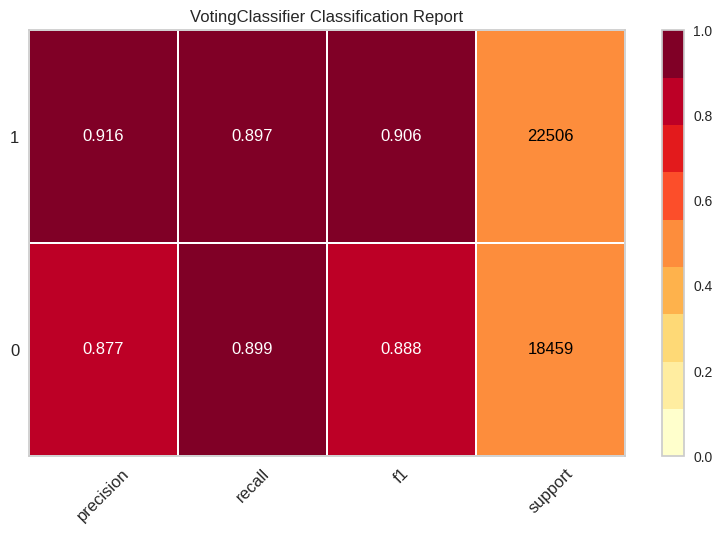

In [ ]:
plot_model(blended_tune, plot = 'class_report')

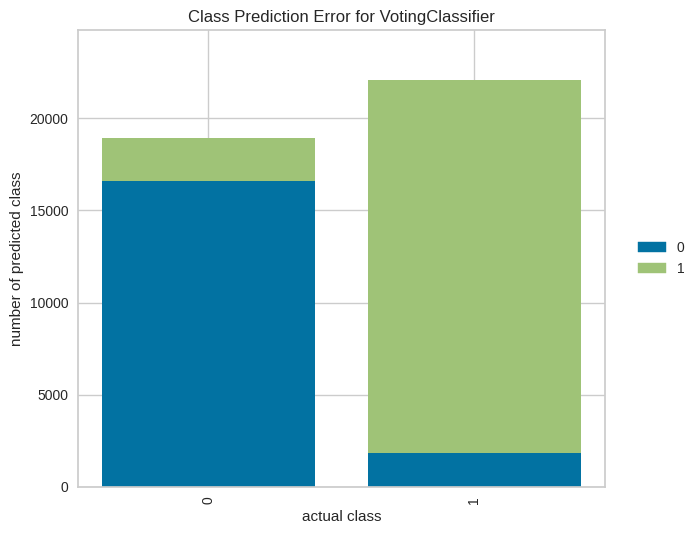

In [ ]:
plot_model(blended_tune, plot = 'error')

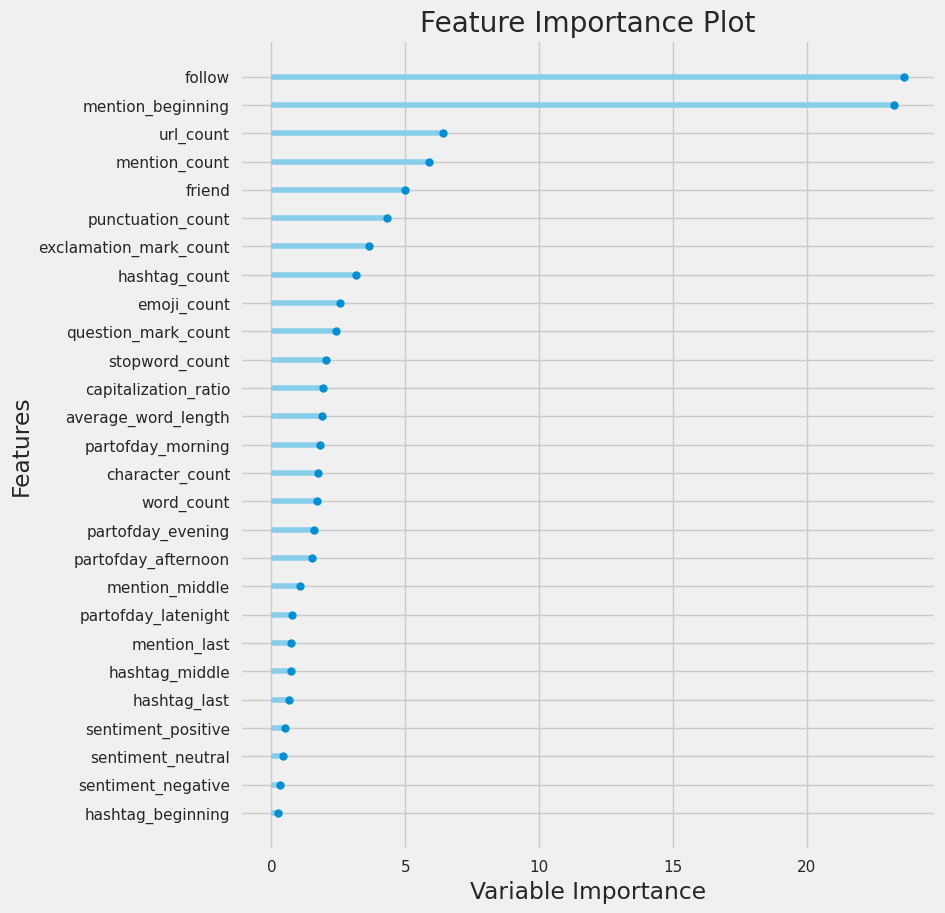

In [ ]:
plot_model(tuned_catboost, plot = 'feature_all')

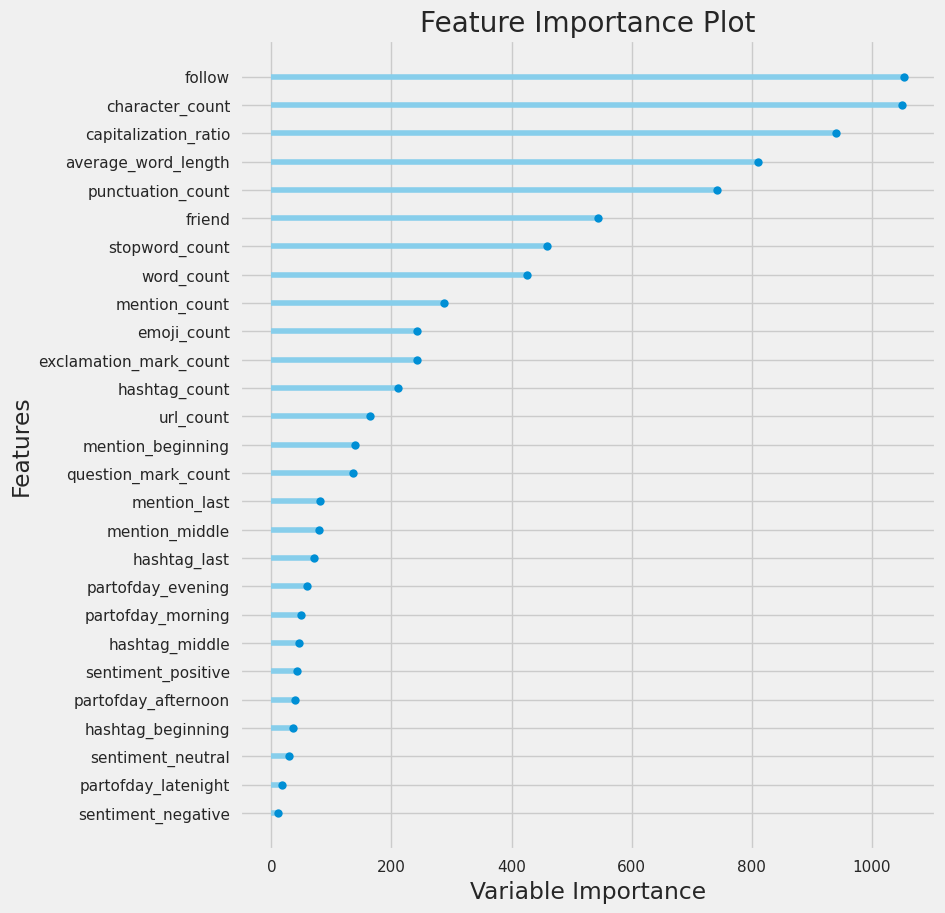

In [ ]:
plot_model(tuned_lightgbm, plot = 'feature_all')

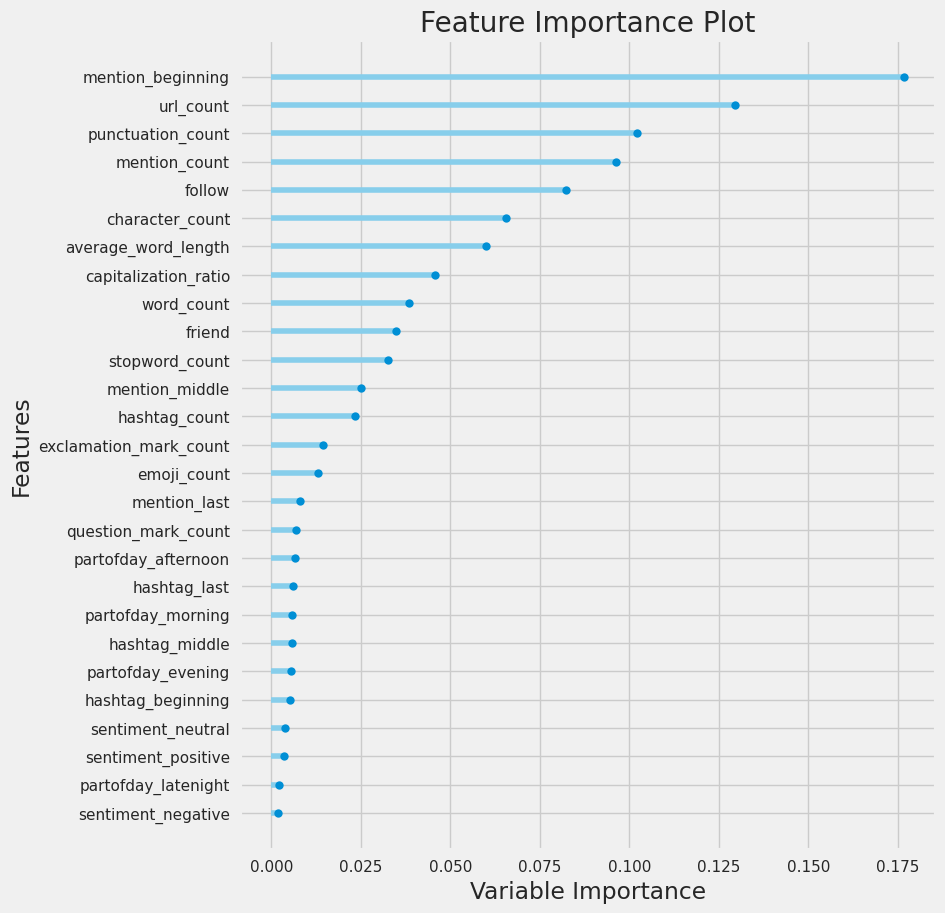

In [ ]:
plot_model(tuned_rf, plot = 'feature_all') #

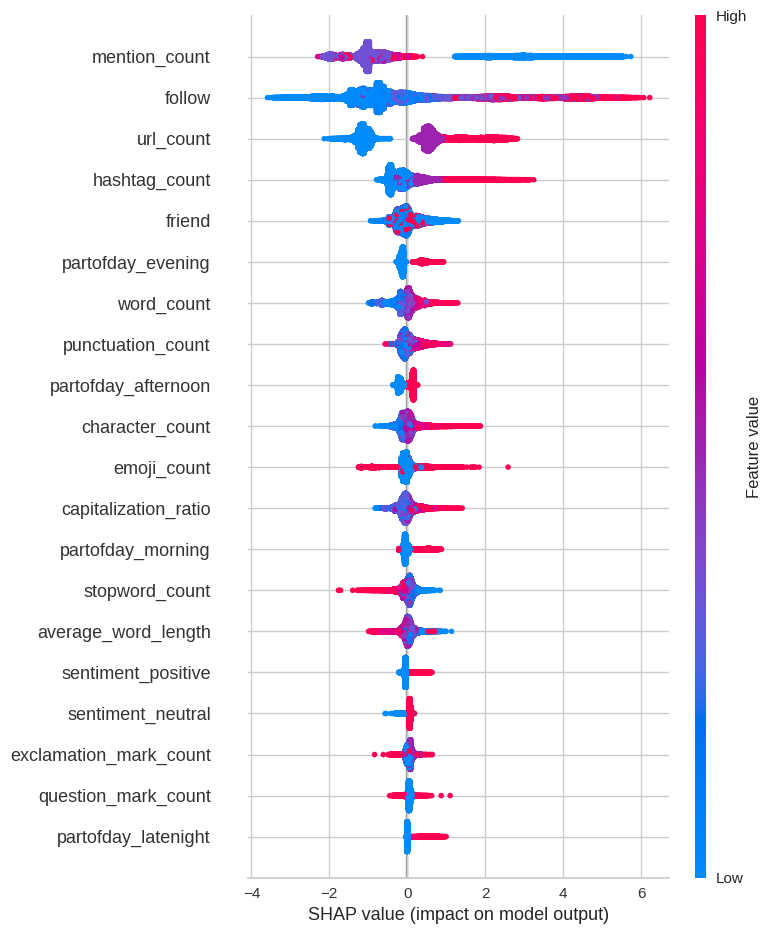

In [ ]:
interpret_model(tuned_catboost)

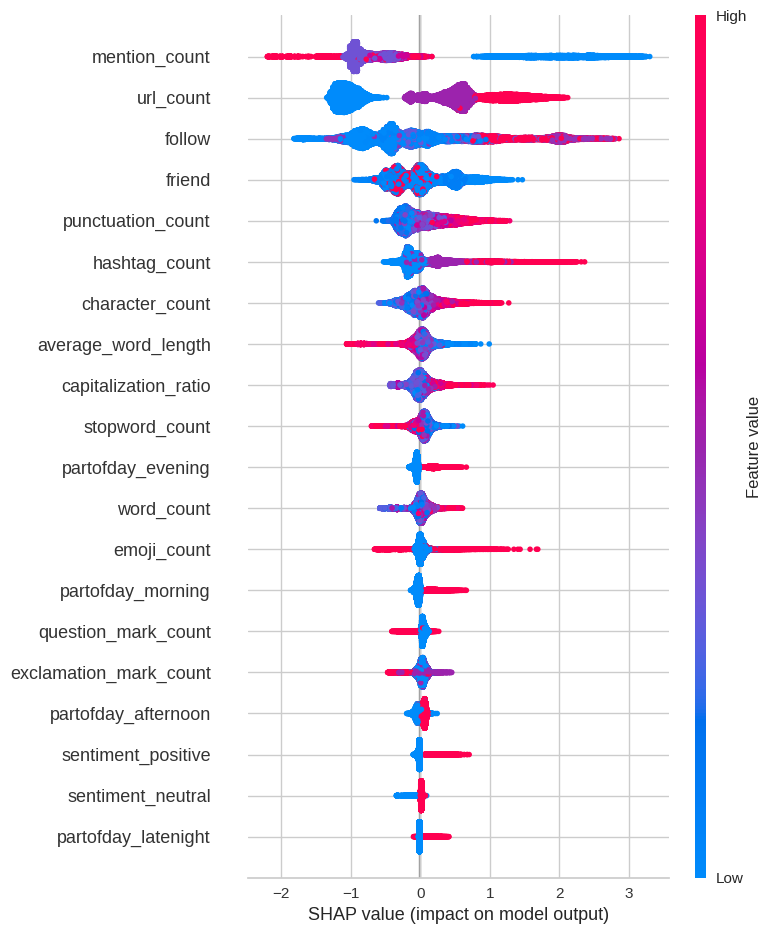

In [ ]:
interpret_model(tuned_lightgbm)

In [ ]:
interpret_model(tuned_rf)

# Predict on test/ hold-out sample

In [ ]:
predict_model(catboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8962,0.9577,0.8940,0.9152,0.9045,0.7909,0.7912


In [ ]:
predict_model(tuned_catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8962,0.9577,0.8940,0.9152,0.9045,0.7909,0.7912


,follow,friend,mention_beginning,mention_middle,mention_last,hashtag_beginning,hashtag_middle,hashtag_last,hashtag_count,mention_count,...,partofday_afternoon,partofday_evening,partofday_latenight,partofday_morning,sentiment_negative,sentiment_neutral,sentiment_positive,rt_binary,prediction_label,prediction_score
23500,227234.0,1780.0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0.9836
98168,10012730.0,108.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,1.0000
33079,541919.0,23450.0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0.9857
13888,541919.0,23450.0,1,1,0,0,0,0,0,2,...,0,1,0,0,0,1,0,1,1,0.9313
20838,674935.0,439.0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,1,1,0.9632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82566,1454473.0,248.0,1,0,0,0,2,1,3,1,...,0,1,0,0,0,1,0,1,1,0.9849
79763,541920.0,23450.0,1,0,0,0,1,0,1,1,...,1,0,0,0,0,1,0,1,1,0.9661
77610,21437956.0,2252.0,0,0,0,0,0,1,1,0,...,0,0,1,0,0,1,0,1,1,1.0000
125942,541919.0,23450.0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0.9571


In [ ]:
predict_model(bagged_catboost);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.8962,0.9577,0.8940,0.9151,0.9044,0.7908,0.7911


In [ ]:
predict_model(rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8940,0.9545,0.8941,0.9114,0.9026,0.7864,0.7866


In [ ]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8940,0.9545,0.8941,0.9114,0.9026,0.7864,0.7866


In [ ]:
predict_model(bagged_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.8966,0.9566,0.8963,0.9138,0.9050,0.7915,0.7917


In [ ]:
predict_model(lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8949,0.9575,0.8911,0.9153,0.9030,0.7883,0.7886


In [ ]:
predict_model(tuned_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8977,0.9588,0.8948,0.9170,0.9058,0.7940,0.7943


In [ ]:
predict_model(bagged_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.8977,0.9589,0.8954,0.9164,0.9058,0.7938,0.7941


In [ ]:
predict_model(blend_ensemble);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8979,0.9589,0.8966,0.9157,0.9061,0.7942,0.7944


In [ ]:
predict_model(blended_tune);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8979,0.9589,0.8966,0.9157,0.9061,0.7942,0.7944


# Finalize Model for Deployment

In [ ]:
final_catboost = finalize_model(catboost)

In [ ]:
final_tuned_catboost = finalize_model(tuned_catboost)

In [ ]:
final_bagged_catboost= finalize_model(bagged_catboost)

In [ ]:
final_rf = finalize_model(rf)

In [ ]:
final_tuned_rf = finalize_model(tuned_rf)

In [ ]:
final_bagged_rf= finalize_model(bagged_rf)

In [ ]:
final_lightgbm = finalize_model(lightgbm)

In [ ]:
final_tuned_lightgbm = finalize_model(tuned_lightgbm)

In [ ]:
final_bagged_lightgbm = finalize_model(bagged_lightgbm)

In [ ]:
final_blend_ensemble = finalize_model(blend_ensemble)

In [ ]:
final_blended_tune = finalize_model(blended_tune)

#Predict on unseen data

In [ ]:
unseen_predictions_1 = predict_model(final_catboost, data=data_unseen); #  0.9337	0.9562	0.8753	0.8885	0.8819	0.8358	0.8358

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9337,0.9562,0.8753,0.8885,0.8819,0.8358,0.8358


In [ ]:
unseen_predictions_2 = predict_model(final_tuned_catboost, data=data_unseen);  #  0.9337	0.9562	0.8753	0.8885	0.8819	0.8358	0.8358

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9337,0.9562,0.8753,0.8885,0.8819,0.8358,0.8358


In [ ]:
unseen_predictions_3 = predict_model(final_bagged_catboost, data=data_unseen); # 0.9334	0.9577	0.8760	0.8869	0.8814	0.8351	0.8351

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.9334,0.9577,0.8760,0.8869,0.8814,0.8351,0.8351


In [ ]:
unseen_predictions_4 = predict_model(final_rf, data=data_unseen); # 0.9908	0.9966	0.9834	0.9839	0.9837	0.9772	0.9772

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9908,0.9966,0.9834,0.9839,0.9837,0.9772,0.9772


In [ ]:
unseen_predictions_5 = predict_model(final_tuned_rf, data=data_unseen); # 0.9908	0.9966	0.9834	0.9839	0.9837	0.9772	0.9772

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9908,0.9966,0.9834,0.9839,0.9837,0.9772,0.9772


In [ ]:
unseen_predictions_6 = predict_model(final_bagged_rf, data=data_unseen); # 0.9631	0.9934	0.9273	0.9413	0.9342	0.9086	0.9086

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.9631,0.9934,0.9273,0.9413,0.9342,0.9086,0.9086


In [ ]:
unseen_predictions_7 = predict_model(final_lightgbm, data=data_unseen);  # 0.9304	0.9516	0.8786	0.8757	0.8771	0.8286	0.8286`

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9304,0.9516,0.8786,0.8757,0.8771,0.8286,0.8286


In [ ]:
unseen_predictions_8 = predict_model(final_tuned_lightgbm, data=data_unseen);  #  0.9328	0.9586	0.8793	0.8828	0.8810	0.8342	0.8342

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9328,0.9586,0.8793,0.8828,0.8810,0.8342,0.8342


In [ ]:
unseen_predictions_9 = predict_model(final_bagged_lightgbm, data=data_unseen);  #  0.9335	0.9597	0.8788	0.8852	0.8820	0.8357	0.8357

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.9335,0.9597,0.8788,0.8852,0.8820,0.8357,0.8357


In [ ]:
unseen_predictions_10 = predict_model(final_blend_ensemble, data=data_unseen); #  0.9380	0.9874	0.8869	0.8930	0.8900	0.8468	0.8468

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9380,0.9874,0.8869,0.8930,0.8900,0.8468,0.8468


In [ ]:
unseen_predictions_11 = predict_model(final_blended_tune, data=data_unseen);  #  0.9380	0.9874	0.8869	0.8930	0.8900	0.8468	0.8468

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9380,0.9874,0.8869,0.8930,0.8900,0.8468,0.8468


In [ ]:
final_blended_tune

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['follow', 'friend',
                                             'hashtag_count', 'mention_count',
                                             'word_count', 'character_count',
                                             'url_count',
                                             'capitalization_ratio',
                                             'exclamation_mark_count',
                                             'question_mark_count',
                                             'emoji_count',
                                             'average_word_length',
                                             'punctuation_count',
                                             'stopword_cou...
                                                                                                  min_samples_split=2,
                                                                                                  min_weight_fraction_leaf=0.0,
                                                                                                  n_estimators=100,
                                                                                                  n_jobs=-1,
                                                                                                  oob_score=False,
                                                                                                  random_state=123,
                                                                                                  verbose=0,
                                                                                                  warm_start=False),
                                                                 max_features=1.0,
                                                                 max_samples=1.0,
                                                                 n_estimators=10,
                                                                 n_jobs=None,
                                                                 oob_score=False,
                                                                 random_state=123,
                                                                 verbose=0,
                                                                 warm_start=False))],
                                  flatten_transform=True, n_jobs=-1,
                                  verbose=False, voting='soft',
                                  weights=None))],
         verbose=False)

# Save Model

In [ ]:
save_model(final_blended_tune,'/content/drive/MyDrive/Thesis/final_blended_tune_23-06')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['follow', 'friend',
                                              'hashtag_count', 'mention_count',
                                              'word_count', 'character_count',
                                              'url_count',
                                              'capitalization_ratio',
                                              'exclamation_mark_count',
                                              'question_mark_count',
                                              'emoji_count',
                                              'average_word_length',
                                              'punctuation_count',
                                              'stopword_cou...
                                                                                                   min_s

In [ ]:
load_final_blended_tune = load_model('/content/drive/MyDrive/Thesis/final_blended_tune_23-06')

Transformation Pipeline and Model Successfully Loaded
